# Pre-processing of avalanche warning data for machine learning


In [1]:
import sys
import pandas as pd  # check out Modin https://towardsdatascience.com/get-faster-pandas-with-modin-even-on-your-laptops-b527a2eeda74
import numpy as np
import json
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Add path to APS modules
aps_pth = Path('.').absolute()
print(aps_pth)
if aps_pth not in sys.path:
    sys.path.append(aps_pth)
sns.set(style="white")
#from sklearn.preprocessing import LabelEncoder
#from pprint import pprint

#pd.set_option("display.max_rows",6)

%matplotlib inline

D:\Dev\APS\aps\notebooks\ml_varsom


In [2]:
# analysis of entire data set - collected using varsomdata2.varsomscripts.avalanchewarningscomplete.get_season_17_18()
#data_pth = Path(r'.\aps\data\varsom\norwegian_avalanche_warnings_season_17_18.csv')
data_pth = Path(r'D:\Dev\APS\aps\data\varsom\norwegian_avalanche_warnings_season_16_19.csv')

#varsom_df = pd.read_csv(aps_pth / data_pth, index_col=0)
varsom_df = pd.read_csv(data_pth, index_col=0)
varsom_df.head()

,author,avalanche_danger,avalanche_problem_1_advice,avalanche_problem_1_cause_id,avalanche_problem_1_cause_name,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_destructive_size_ext_name,avalanche_problem_1_distribution_id,avalanche_problem_1_distribution_name,avalanche_problem_1_exposed_height_1,...,region_id,region_name,region_type_id,region_type_name,snow_surface,utm_east,utm_north,utm_zone,valid_from,valid_to
index,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,Not given,0,Not given,0,Not given,0,Not given,0,...,3003,Nordenskiöld Land,10,A,NaN,0,0,0,2016-12-01 00:00:00.000,2016-12-01 23:59:59.000
1,NaN,NaN,Not given,0,Not given,0,Not given,0,Not given,0,...,3007,Vest-Finnmark,10,A,NaN,0,0,0,2016-12-01 00:00:00.000,2016-12-01 23:59:59.000
2,NaN,NaN,Not given,0,Not given,0,Not given,0,Not given,0,...,3009,Nord-Troms,10,A,NaN,0,0,0,2016-12-01 00:00:00.000,2016-12-01 23:59:59.000
3,NaN,NaN,Not given,0,Not given,0,Not given,0,Not given,0,...,3010,Lyngen,10,A,NaN,0,0,0,2016-12-01 00:00:00.000,2016-12-01 23:59:59.000
4,NaN,NaN,Not given,0,Not given,0,Not given,0,Not given,0,...,3011,Tromsø,10,A,NaN,0,0,0,2016-12-01 00:00:00.000,2016-12-01 23:59:59.000


In [3]:
varsom_df.columns.values

array(['author', 'avalanche_danger', 'avalanche_problem_1_advice',
       'avalanche_problem_1_cause_id', 'avalanche_problem_1_cause_name',
       'avalanche_problem_1_destructive_size_ext_id',
       'avalanche_problem_1_destructive_size_ext_name',
       'avalanche_problem_1_distribution_id',
       'avalanche_problem_1_distribution_name',
       'avalanche_problem_1_exposed_height_1',
       'avalanche_problem_1_exposed_height_2',
       'avalanche_problem_1_exposed_height_fill',
       'avalanche_problem_1_ext_id', 'avalanche_problem_1_ext_name',
       'avalanche_problem_1_probability_id',
       'avalanche_problem_1_probability_name',
       'avalanche_problem_1_problem_id',
       'avalanche_problem_1_problem_type_id',
       'avalanche_problem_1_problem_type_name',
       'avalanche_problem_1_trigger_simple_id',
       'avalanche_problem_1_trigger_simple_name',
       'avalanche_problem_1_type_id', 'avalanche_problem_1_type_name',
       'avalanche_problem_1_valid_expositions',

Check if there are missing values.

In [4]:
# for col in varsom_df.columns.values:
#     print(f'{col}: {varsom_df[col].unique()} \n')

In [5]:
# Find the amount of NaN values in each column
print(varsom_df.isnull().sum().sort_values(ascending=False))

mountain_weather_change_hour_of_day_start        14614
mountain_weather_change_hour_of_day_stop         14614
mountain_weather_change_wind_speed               14602
mountain_weather_fl_hour_of_day_stop             13670
mountain_weather_fl_hour_of_day_start            13670
latest_avalanche_activity                        12971
current_weak_layers                              12022
mountain_weather_freezing_level                  11902
mountain_weather_temperature_max                 11533
mountain_weather_temperature_min                 11532
mountain_weather_temperature_elevation           11515
mountain_weather_precip_most_exposed             11491
snow_surface                                     11490
mountain_weather_precip_region                   11489
mountain_weather_wind_speed                      11486
latest_observations                               9157
avalanche_danger                                  7676
emergency_warning                                 7657
danger_lev

Fill missing values where necessary.

In [6]:
varsom_df['mountain_weather_wind_speed'] = varsom_df['mountain_weather_wind_speed'].fillna('None')
varsom_df['mountain_weather_wind_direction'] = varsom_df['mountain_weather_wind_direction'].fillna('None')
print(varsom_df.isnull().sum().sort_values(ascending=False))

mountain_weather_change_hour_of_day_start        14614
mountain_weather_change_hour_of_day_stop         14614
mountain_weather_change_wind_speed               14602
mountain_weather_fl_hour_of_day_start            13670
mountain_weather_fl_hour_of_day_stop             13670
latest_avalanche_activity                        12971
current_weak_layers                              12022
mountain_weather_freezing_level                  11902
mountain_weather_temperature_max                 11533
mountain_weather_temperature_min                 11532
mountain_weather_temperature_elevation           11515
mountain_weather_precip_most_exposed             11491
snow_surface                                     11490
mountain_weather_precip_region                   11489
latest_observations                               9157
avalanche_danger                                  7676
emergency_warning                                 7657
danger_level_name                                 7657
author    

## Feature engineering
Re-label og -classifiy variables where necessary.

Add an avalanche problem severity index - based on its attributes size, distribution and sensitivity.


In [9]:
#from aps.notebooks.ml_varsom.regroup_forecast import regroup
from regroup_forecast import regroup
varsom_df = regroup(varsom_df)

Add historical values, e.g. yesterdays precipitation

Add a tag to the feature name to indicate if it is categorical (c) or numerical (n).
Add a target tag (t).
Add a modelled (m) or observed (o) tag.

_prev1day
_prev3day

n_f_Next24HourChangeInTempFromPrev3DayMax - change of temperature over a certain period.
n_r_Prev7dayMinTemp2InPast - ???
n_r_SNOWDAS_SnowpackAveTemp_k2InPast - modelled average temperature from model SNOWDAS (? https://nsidc.org/data/g02158)



In [10]:
# Check if sensitivity transformation worked...
print(varsom_df['avalanche_problem_1_sensitivity_id_class'].value_counts())

0    7731
3    5198
2    1617
5    1519
6     250
1     185
4     132
Name: avalanche_problem_1_sensitivity_id_class, dtype: int64


In [11]:
varsom_df['danger_level_prev1day'] = varsom_df['danger_level'].shift(1)
varsom_df['danger_level_name_prev1day'] = varsom_df['danger_level_name'].shift(1)
varsom_df['danger_level_prev2day'] = varsom_df['danger_level'].shift(2)
varsom_df['danger_level_name_prev2day'] = varsom_df['danger_level_name'].shift(2)
varsom_df['danger_level_prev3day'] = varsom_df['danger_level'].shift(3)
varsom_df['danger_level_name_prev3day'] = varsom_df['danger_level_name'].shift(3)



varsom_df['mountain_weather_precip_region_prev1day'] = varsom_df['mountain_weather_precip_region'].shift(1)
varsom_df['mountain_weather_precip_most_exposed_prev1day'] = varsom_df['mountain_weather_precip_most_exposed'].shift(1)

varsom_df['mountain_weather_precip_region_prev3daysum'] = varsom_df['mountain_weather_precip_region'].shift(1) + varsom_df['mountain_weather_precip_region'].shift(2) + varsom_df['mountain_weather_precip_region'].shift(3)

varsom_df.filter(['mountain_weather_precip_region', 'mountain_weather_precip_region_prev3daysum']).head(12)

,mountain_weather_precip_region,mountain_weather_precip_region_prev3daysum
index,,
0,NaN,NaN
1,NaN,NaN
2,NaN,NaN
3,NaN,NaN
4,NaN,NaN
5,NaN,NaN
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN


Combine avalanche problem attributes into single parameter

In [12]:
def get_aval_problem_combined(type_, dist_, sens_, size_):
    return int("{0}{1}{2}{3}".format(type_, dist_, sens_, size_))


def print_aval_problem_combined(aval_combined_int):
    aval_combined_str = str(aval_combined_int)
    #with open(aps_pth / r'aps/config/snoskred_keys.json') as jdata:
    with open(r'D:\Dev\APS\aps\config\snoskred_keys.json') as jdata:
        snoskred_keys = json.load(jdata)
    type_ = snoskred_keys["Class_AvalancheProblemTypeName"][aval_combined_str[0]]
    dist_ = snoskred_keys["Class_AvalDistributionName"][aval_combined_str[1]]
    sens_ = snoskred_keys["Class_AvalSensitivityId"][aval_combined_str[2]]
    size_ = snoskred_keys["Class_AvalDistributionName"][aval_combined_str[3]]
    
    return f"{type_}:{dist_}:{sens_}:{size_}"

print(print_aval_problem_combined(6221))
    
    
    
varsom_df['aval_problem_1_combined'] = varsom_df.apply(lambda row: get_aval_problem_combined(row['avalanche_problem_1_problem_type_id_class'],
                                                                                     row['avalanche_problem_1_distribution_id'],
                                                                                     row['avalanche_problem_1_sensitivity_id_class'], #avalanche_problem_1_trigger_simple_id_class / avalanche_problem_1_sensitivity_id_class
                                                                                     row['avalanche_problem_1_destructive_size_ext_id']), axis=1)

aval_uni = varsom_df['aval_problem_1_combined'].unique()
print(aval_uni, len(aval_uni))
print(varsom_df['aval_problem_1_combined'].value_counts())
print(varsom_df['avalanche_problem_1_problem_type_id_class'].value_counts())

Wind slab:Specific:Stubborn:Isolated
[   0 6212 5232 6232 7222 5222 7102 6131 6222 6102 5253 5153 6202 5332
 2362 2252 5233 7112 6121 5342 5223 7253 4153 6252 5252 4152 5242 5243
 5132 6132 5333 6122 7212 6233 5230 7132 7122 4252 4121 5122 4253 4232
 4151 5231 2231 2232 5152 5131 6111 6231 5352 5363 5353 5263 7313 7363
 4263 7333 4362 4353 4463 4352 7233 6242 6223 6332 6333 5343 6253 6262
 7223 6230 7332 7352 7232 5133 3252 6352 6152 2152 4354 4363 3253 3152
 3153 7322 7133 6101 7123 6112 2352 6363 6243 5362 7243 6322 7203 6342
 7242 7342 6353 7213 7252 4262 6263 6264 6303 2253 4223 4222 2262 4123
 2251 2351 2261 2332 7153 1351 5331 6331 1152 2151 7353 4233 7323 2361
 4132 2131 2250 3263 6343 7121 6221 6133 7113 7263  232 5221 4332 6200
 4264 4254 3132 6220 6123 1232 7231 6211 7131 6354 7254 7152 6362 2141
 7324 7224 7134 7234 7124 7154 2263 4154 4134 2221 5262 2132 2130 4133
 2122 2153 2121 2111 5111  122 2212 5121 6323 6254 7214 2353] 180
0       7714
6232    1415
5232     761
6222  

Hot encode categorical variables where necessary.

In [13]:
# hot encode
hot_encode_ = ['emergency_warning', 'author', 'mountain_weather_wind_direction']
varsom_df = pd.get_dummies(varsom_df, columns=hot_encode_)

Check if there are no weired or missing values.

In [14]:
# Check if there are no weired or missing values.
for col in varsom_df.columns.values:
    print(f'{col}: {varsom_df[col].unique()} \n')

avalanche_danger: [nan
 'Snøen i leområdene er generelt sett stabile og det er ujevn fordeling av snøen i terrenget. Litt nysnø ventes ikke å øke skredfaren.\r\n \r\nSkredfaren vurderes som 2-moderat, og så vidt det da det er lite snø i regionen.\r\n\r\nNB: Tidlig på sesongen baserer varslet seg på få observasjoner og varslet kan derfor være noe usikkert.'
 'Litt påfyll av nysnø i kombinasjon med vind føre til dannelse av nysnøflak i leområder, i hovedsak S-SV. \r\nEnkelte steder kan det finnes et ustabilt kantkornlag mot bakken. Eventuelle skred vil bli begrenset i størrelse da det generelt er lite snø og snøen ligger ujevnt fordelt i terrenget.'
 ...
 'Nysnøen som kom i helga er mange steder løs og vinden kan være sterk nok til å flytte snø inn i heng mot NV. Nysnøflakene ventes å ha begrenset utbredelse og tykkelse, men kan legge seg på løs snø og noen få steder rim. De vil derfor kunne løses ut av en skiløper.  Det er vanskelig å løse ut skred i vedvarende svake lag av kantkorn. Væ

Remove variables we know we do not need. In this case mainly because they are redundant like the _avalanche\_problem\_1\_ext\_name_ and _avalanche\_problem\_1\_ext\_id_ - in this case we only keep the numeric _id_ variable.

In [15]:
del_list = [
    'utm_zone',
    'utm_east',
    'utm_north',
    'danger_level_name',
    'avalanche_problem_1_exposed_height_fill',
    'avalanche_problem_2_exposed_height_fill',
    'avalanche_problem_3_exposed_height_fill',
    'avalanche_problem_1_valid_expositions',
    'avalanche_problem_2_valid_expositions',
    'avalanche_problem_3_valid_expositions',
    'avalanche_problem_1_cause_name',
    'avalanche_problem_1_problem_type_name',
    'avalanche_problem_1_destructive_size_ext_name',
    'avalanche_problem_1_distribution_name',
    'avalanche_problem_1_ext_name',
    'avalanche_problem_1_probability_name',
    'avalanche_problem_1_trigger_simple_name',
    'avalanche_problem_1_type_name',
    'avalanche_problem_2_cause_name',
    'avalanche_problem_2_problem_type_name',
    'avalanche_problem_2_destructive_size_ext_name',
    'avalanche_problem_2_distribution_name',
    'avalanche_problem_2_ext_name',
    'avalanche_problem_2_probability_name',
    'avalanche_problem_2_trigger_simple_name',
    'avalanche_problem_2_type_name',
    'avalanche_problem_3_cause_name',
    'avalanche_problem_3_problem_type_name',
    'avalanche_problem_3_destructive_size_ext_name',
    'avalanche_problem_3_distribution_name',
    'avalanche_problem_3_ext_name',
    'avalanche_problem_3_probability_name',
    'avalanche_problem_3_trigger_simple_name',
    'avalanche_problem_3_type_name',
    'latest_avalanche_activity',
    'main_text',
    'snow_surface',
    'current_weak_layers',
    'avalanche_danger',
    'avalanche_problem_1_advice',
    'avalanche_problem_2_advice',
    'avalanche_problem_3_advice',
    'mountain_weather_wind_speed',
    'region_type_name',
    'region_name',
    'reg_id',
    'valid_from',
    'valid_to'
]
removed_ = [varsom_df.pop(v) for v in del_list]

Fill missing values where necessary

In [16]:
fill_list = [
    'mountain_weather_freezing_level',
    'mountain_weather_precip_region',
    'mountain_weather_precip_region_prev1day',
    'mountain_weather_precip_region_prev3daysum',
    'mountain_weather_precip_most_exposed',
    'mountain_weather_precip_most_exposed_prev1day',
    'mountain_weather_temperature_min',
    'mountain_weather_temperature_max',
    'mountain_weather_temperature_elevation'
]
filled_ = [varsom_df[v].fillna(0., inplace=True) for v in fill_list]

Eventually remove variables with many missing values.

In [17]:
del_list = [
    'mountain_weather_change_wind_direction',
    'mountain_weather_change_hour_of_day_start',
    'mountain_weather_change_hour_of_day_stop',
    'mountain_weather_change_wind_speed',
    'mountain_weather_fl_hour_of_day_stop',
    'mountain_weather_fl_hour_of_day_start',
    'latest_observations'
]
removed_ = [varsom_df.pop(v) for v in del_list]

Check again if there are still values missing...

In [18]:
# Find the amount of NaN values in each column
print(varsom_df.isnull().sum().sort_values(ascending=False))

danger_level_name_prev3day                       7660
danger_level_name_prev2day                       7659
danger_level_name_prev1day                       7658
danger_level_prev3day                               3
danger_level_prev2day                               2
danger_level_prev1day                               1
mountain_weather_freezing_level                     0
mountain_weather_temperature_max                    0
mountain_weather_temperature_elevation              0
mountain_weather_precip_region                      0
mountain_weather_precip_most_exposed                0
avalanche_problem_3_type_id                         0
date_valid                                          0
danger_level                                        0
publish_time                                        0
avalanche_problem_3_trigger_simple_id               0
mountain_weather_temperature_min                    0
mountain_weather_wind_speed_num                     0
region_id                   

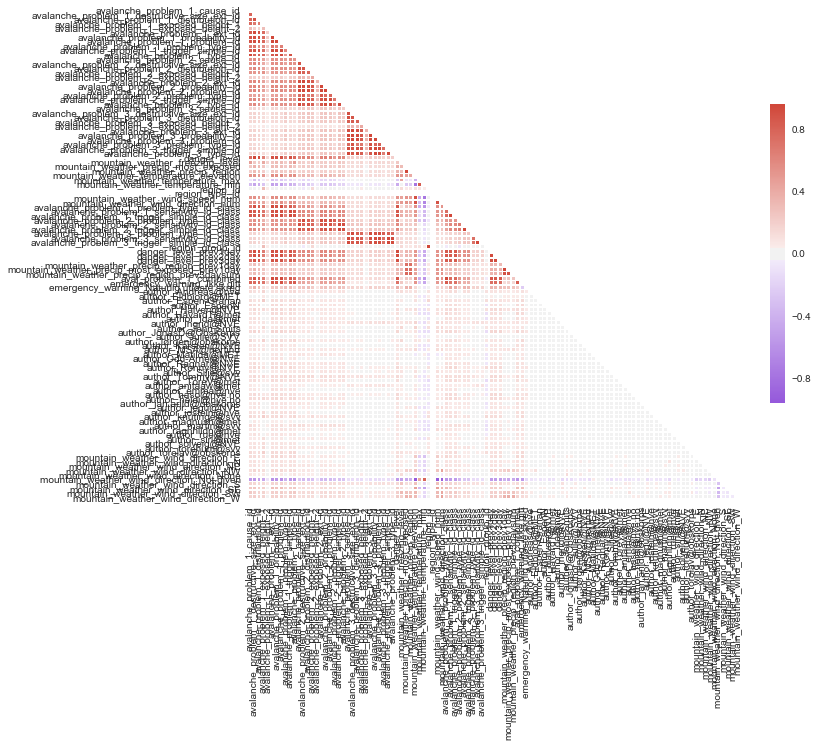

In [19]:
# Compute the correlation matrix - works only on numerical variables.
corr = varsom_df.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 11))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(1000, 15, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.8, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

We can see that some parameters are highly correlated. These are mainly the parameters belonging to the same avalanche problem. Depending on the ML algorithm we use we have to remove some of them.

In [20]:
#corr['avalanche_problem_1_cause_id'].sort_values(ascending=False)
#corr

In [21]:
#sns.pairplot(varsom_df.drop(['date_valid'], axis=1))

In [22]:
# let's see the details about remainig variables 

varsom_df.describe()

,avalanche_problem_1_cause_id,avalanche_problem_1_destructive_size_ext_id,avalanche_problem_1_distribution_id,avalanche_problem_1_exposed_height_1,avalanche_problem_1_exposed_height_2,avalanche_problem_1_ext_id,avalanche_problem_1_probability_id,avalanche_problem_1_problem_id,avalanche_problem_1_problem_type_id,avalanche_problem_1_trigger_simple_id,...,mountain_weather_wind_direction_E,mountain_weather_wind_direction_N,mountain_weather_wind_direction_NE,mountain_weather_wind_direction_NW,mountain_weather_wind_direction_None,mountain_weather_wind_direction_Not given,mountain_weather_wind_direction_S,mountain_weather_wind_direction_SE,mountain_weather_wind_direction_SW,mountain_weather_wind_direction_W
count,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,...,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000,16632.000000
mean,7.504990,1.160955,1.012145,335.918711,34.704185,10.563672,1.642496,0.536195,7.453523,10.168951,...,0.027718,0.012205,0.013949,0.027898,0.004630,0.690536,0.034392,0.097042,0.051166,0.040464
std,7.876984,1.170615,1.027010,401.058530,150.562400,9.951601,1.561408,0.498703,10.808093,10.027457,...,0.164168,0.109805,0.117283,0.164686,0.067886,0.462286,0.182238,0.296024,0.220344,0.197051
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,10.000000,1.000000,1.000000,200.000000,0.000000,15.000000,3.000000,1.000000,5.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,13.000000,2.000000,2.000000,600.000000,0.000000,20.000000,3.000000,1.000000,10.000000,21.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,24.000000,4.000000,4.000000,2100.000000,2000.000000,25.000000,5.000000,1.000000,50.000000,22.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Save data for further analysis

In [23]:
varsom_df.to_csv('varsom_ml_preproc_3y.csv', index_label='index')

#### Now we have clean data and can build a model

The library we'll use is called **sckit-learn**. 

http://scikit-learn.org

- Python library
- Access to well known machine learning algorithms
- Built on NumPy, SciPy, and matplotlib
- Open Source
- Well documented with many good tutorials


## Worklflow of scikit-learn

- Create model object
- .fit
- .predict
- evaluate